In [99]:
# Import PyTorch

import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [100]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

### 1. Get Data

In [101]:
import zipfile
from pathlib import Path

# Setup path to a data folder

data_path = Path("drive/MyDrive/Data Projects/Dog Breed Image Dataset")
image_path = data_path / "dog_breed_images"

with zipfile.ZipFile(data_path / "dogbreedimage.zip", "r") as zip_ref:
  print("Unzipping Dog Breed Images...")
  zip_ref.extractall(image_path)

Unzipping Dog Breed Images...


In [102]:
import os

def datapath(dir_path):
  """ Walkks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [103]:
datapath(image_path)

There are 1 directories and 0 images in 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images'.
There are 10 directories and 0 images in 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/dataset'.
There are 0 directories and 100 images in 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/dataset/Beagle'.
There are 0 directories and 100 images in 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/dataset/Boxer'.
There are 0 directories and 100 images in 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/dataset/Bulldog'.
There are 0 directories and 96 images in 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/dataset/Dachshund'.
There are 0 directories and 96 images in 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/dataset/German_Shepherd'.
There are 0 directories and 91 images in 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/d

In [104]:
# import shutil
# import random
# from sklearn.model_selection import train_test_split

# dataset_dir = 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/dataset'
# train_dir = 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/train'
# val_dir = 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/val'
# test_dir = 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/test'
# breeds = ['Golden_Retriever', 'German_Shepherd', 'Labrador_Retriever', 'Bulldog', 'Beagle',
#           'Poodle', 'Rottweiler', 'Yorkshire_Terrier', 'Boxer', 'Dachshund']

# for breed in breeds:
#     os.makedirs(os.path.join(train_dir, breed), exist_ok=True)
#     os.makedirs(os.path.join(val_dir, breed), exist_ok=True)
#     os.makedirs(os.path.join(test_dir, breed), exist_ok=True)

# train_ratio = 0.7
# val_ratio = 0.2
# test_ratio = 0.1

# for breed in breeds:
#     images = os.listdir(os.path.join(dataset_dir, breed))
#     train_images, val_test_images = train_test_split(images, test_size=1-train_ratio, random_state=42)
#     val_images, test_images = train_test_split(val_test_images, test_size=test_ratio/(test_ratio+val_ratio), random_state=42)

#     for img in train_images:
#         shutil.copy(os.path.join(dataset_dir, breed, img), os.path.join(train_dir, breed, img))
#     for img in val_images:
#         shutil.copy(os.path.join(dataset_dir, breed, img), os.path.join(val_dir, breed, img))
#     for img in test_images:
#         shutil.copy(os.path.join(dataset_dir, breed, img), os.path.join(test_dir, breed, img))

In [105]:
import shutil
import random
from sklearn.model_selection import train_test_split

dataset_dir = 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/dataset'
train_dir = 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/train'
test_dir = 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/test'
breeds = ['Golden_Retriever', 'German_Shepherd', 'Labrador_Retriever', 'Bulldog', 'Beagle',
          'Poodle', 'Rottweiler', 'Yorkshire_Terrier', 'Boxer', 'Dachshund']

for breed in breeds:
    os.makedirs(os.path.join(train_dir, breed), exist_ok=True)
    os.makedirs(os.path.join(test_dir, breed), exist_ok=True)

for breed in breeds:
    images = os.listdir(os.path.join(dataset_dir, breed))
    train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)

    for img in train_images:
        shutil.copy(os.path.join(dataset_dir, breed, img), os.path.join(train_dir, breed, img))
    for img in test_images:
        shutil.copy(os.path.join(dataset_dir, breed, img), os.path.join(test_dir, breed, img))

In [106]:
train_dir, test_dir

('drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/train',
 'drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/test')

In [107]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/train'),
 PosixPath('drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/test'))

drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/dataset/Dachshund/Dachshund_52.jpg
Dachshund
Random image path: drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/dataset/Dachshund/Dachshund_52.jpg
Image class: Dachshund
Image height: 108
Image width: 162


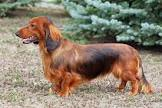

In [108]:
import random
from PIL import Image

# Set see
# random.seed(42)

# 1. Get all image path

image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path

random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from the path name

image_class = random_image_path.parent.stem

print(image_class)

# 4. Open Image
img = Image.open(random_image_path)

# 5. Print metadata

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

img

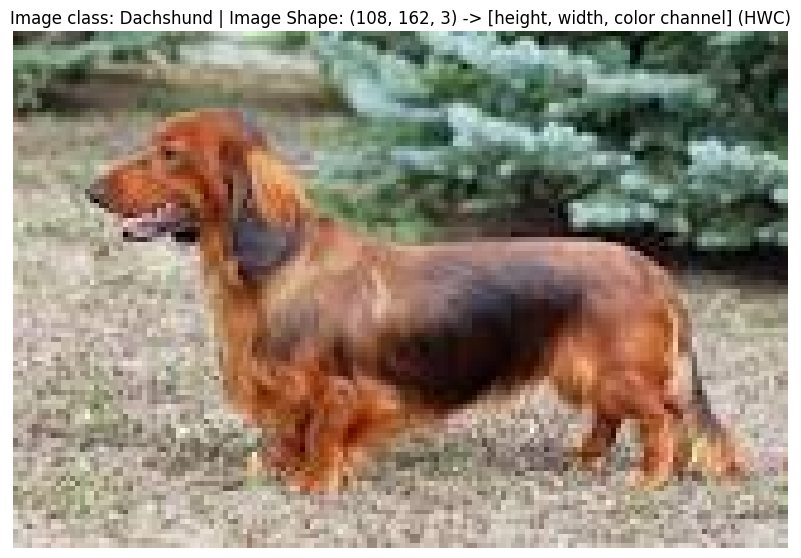

In [109]:
# Try to visualise and image with matplotlib...

import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image Shape: {img_as_array.shape} -> [height, width, color channel] (HWC)")
plt.axis(False);

## 2. Transforming data

In [110]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [111]:
# Transform from image

data_transform = transforms.Compose([
    # Resize our images to 64 x 64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [112]:
# data_transform(img).shape

In [113]:
# Use ImageFolderto create dataset(s)

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target


test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 675
     Root location: drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 292
     Root location: drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [114]:
train_data.classes

['Beagle',
 'Boxer',
 'Bulldog',
 'Dachshund',
 'German_Shepherd',
 'Golden_Retriever',
 'Labrador_Retriever',
 'Poodle',
 'Rottweiler',
 'Yorkshire_Terrier']

In [115]:
idx = train_data.class_to_idx

idx

{'Beagle': 0,
 'Boxer': 1,
 'Bulldog': 2,
 'Dachshund': 3,
 'German_Shepherd': 4,
 'Golden_Retriever': 5,
 'Labrador_Retriever': 6,
 'Poodle': 7,
 'Rottweiler': 8,
 'Yorkshire_Terrier': 9}

In [116]:
len(train_data), len(test_data)

(675, 292)

In [117]:
train_data.samples[0]

('drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/train/Beagle/Beagle_10.jpg',
 0)

In [118]:
img, label = train_data[1][0], train_data[1][1]

print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatye: {type(label)}")

Image tensor:
 tensor([[[0.7333, 0.6157, 0.3647,  ..., 0.2980, 0.2549, 0.2549],
         [0.7451, 0.6353, 0.3922,  ..., 0.2471, 0.2235, 0.2353],
         [0.7647, 0.6588, 0.4235,  ..., 0.1961, 0.2078, 0.2275],
         ...,
         [0.0235, 0.0235, 0.0314,  ..., 0.6941, 0.6824, 0.6510],
         [0.0314, 0.0314, 0.0314,  ..., 0.6902, 0.6784, 0.6471],
         [0.0431, 0.0431, 0.0431,  ..., 0.6863, 0.6706, 0.6431]],

        [[0.7020, 0.6000, 0.3725,  ..., 0.4078, 0.3686, 0.3569],
         [0.7098, 0.6157, 0.4000,  ..., 0.3529, 0.3333, 0.3412],
         [0.7176, 0.6314, 0.4275,  ..., 0.2941, 0.3137, 0.3373],
         ...,
         [0.0196, 0.0196, 0.0275,  ..., 0.6392, 0.6314, 0.6078],
         [0.0275, 0.0275, 0.0275,  ..., 0.6353, 0.6235, 0.6039],
         [0.0392, 0.0392, 0.0392,  ..., 0.6314, 0.6196, 0.6000]],

        [[0.7765, 0.6078, 0.2980,  ..., 0.1725, 0.1176, 0.1294],
         [0.7922, 0.6353, 0.3373,  ..., 0.1333, 0.0980, 0.1216],
         [0.8078, 0.6706, 0.3843,  ..., 0.1

In [119]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 675
     Root location: drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 292
     Root location: drive/MyDrive/Data Projects/Dog Breed Image Dataset/dog_breed_images/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

### 3. Turn image into DataLoader

In [120]:
# Turn train and test dataset into dataloader

# from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d6187140d90>,
 <torch.utils.data.dataloader.DataLoader at 0x7d6187140970>)

In [121]:
len(train_dataloader), len(test_dataloader)

(22, 10)

In [122]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [123]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

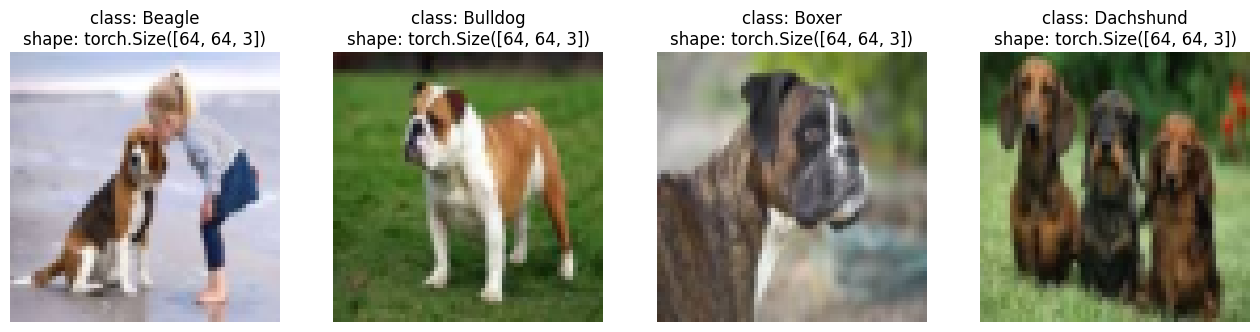

In [124]:
class_names = train_data.classes

display_random_images(dataset=train_data,
                      classes=class_names,
                      n=4,
                      seed=None)

In [125]:
class DogBreed(nn.Module):
  def __init__(self, input_shape: int, hidden_units:int, output_shape:int):
     super().__init__()
     self.conv_block_1 = nn.Sequential(
         nn.Conv2d(in_channels=input_shape,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2,
                      stride=2)
     )
     self.conv_block_2 = nn.Sequential(
         nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2,
                      stride=2)
     )
    #  self.conv_block_3 = nn.Sequential(
    #      nn.Conv2d(in_channels=hidden_units,
    #                out_channels=hidden_units,
    #                kernel_size=3,
    #                stride=1,
    #                padding=1),
    #      nn.ReLU(),
    #      nn.Conv2d(in_channels=hidden_units,
    #                out_channels=hidden_units,
    #                kernel_size=3,
    #                stride=1,
    #                padding=1),
    #      nn.ReLU(),
    #      nn.MaxPool2d(kernel_size=2,
    #                   stride=2)
    #  )
     self.classifier = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features=hidden_units*16*16,
                   out_features=output_shape)
     )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [126]:
len(train_data.classes)

10

In [127]:
torch.manual_seed(42)

model = DogBreed(input_shape=3, hidden_units=32, output_shape=len(train_data.classes)).to(device)

print(model)

DogBreed(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8192, out_features=10, bias=True)
  )
)


In [128]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model, input_size=[32, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
DogBreed                                 [32, 10]                  --
├─Sequential: 1-1                        [32, 32, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 32, 64, 64]          896
│    └─ReLU: 2-2                         [32, 32, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 32, 64, 64]          9,248
│    └─ReLU: 2-4                         [32, 32, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 32, 32, 32]          --
├─Sequential: 1-2                        [32, 32, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 32, 32, 32]          9,248
│    └─ReLU: 2-7                         [32, 32, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 32, 32, 32]          9,248
│    └─ReLU: 2-9                         [32, 32, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 32, 16, 16]          --
├─Seq

In [129]:
# import requests
# from pathlib import Path

# # Download helper functions from Learn PyTorch repo (if not already downloaded)
# if Path("helper_functions.py").is_file():
#   print("helper_functions.py already exists, skipping download")
# else:
#   print("Downloading helper_functions.py")
#   # Note: you need the "raw" GitHub URL for this to work
#   request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
#   with open("helper_functions.py", "wb") as f:
#     f.write(request.content)

In [130]:
# # Setup loss function/eval metrics/optimizer

# from helper_functions import accuracy_fn

# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model.parameters(),
#                             lr=0.1)

In [131]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [132]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [133]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [134]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10


# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_results = train(model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.3066 | train_acc: 0.1080 | test_loss: 2.2755 | test_acc: 0.1625
Epoch: 2 | train_loss: 2.1537 | train_acc: 0.2481 | test_loss: 2.0596 | test_acc: 0.2406
Epoch: 3 | train_loss: 1.9474 | train_acc: 0.3168 | test_loss: 1.7620 | test_acc: 0.3688
Epoch: 4 | train_loss: 1.6157 | train_acc: 0.4186 | test_loss: 1.5842 | test_acc: 0.4313
Epoch: 5 | train_loss: 1.3355 | train_acc: 0.5455 | test_loss: 1.3483 | test_acc: 0.5531
Epoch: 6 | train_loss: 0.8942 | train_acc: 0.7022 | test_loss: 0.9503 | test_acc: 0.6937
Epoch: 7 | train_loss: 0.5608 | train_acc: 0.8092 | test_loss: 0.6764 | test_acc: 0.7875
Epoch: 8 | train_loss: 0.4874 | train_acc: 0.8371 | test_loss: 0.3891 | test_acc: 0.9125
Epoch: 9 | train_loss: 0.2216 | train_acc: 0.9403 | test_loss: 0.3117 | test_acc: 0.9344
Epoch: 10 | train_loss: 0.1102 | train_acc: 0.9688 | test_loss: 0.2954 | test_acc: 0.9281
Total training time: 115.950 seconds
